#Import des bibliothèques

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Sources :
- https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
- https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95
- https://www.kaggle.com/kishoresgowda/data-analysis-on-penguins-dataset
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://salmuz.github.io/teaching.html

#Import des datasets
- dataset "raw" : contient deux colonnes d'identification en +
- dataset "penguins" : contient seulement les données utiles

In [ ]:
data_source = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins_raw.csv")
data_raw = data_source

data_source = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins.csv')
data_standard = data_source

data_raw.head()
data_standard.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


#Nettoyage des données

Version compacte du nettoyage :

In [ ]:
data_source = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins_raw.csv")
data_raw = data_source

dropped_columns = [ 
    'studyName', 
    'Sample Number', 
    'Region', 
    'Stage' , 
    'Individual ID',
    'Comments', 
    'Delta 15 N (o/oo)', 
    'Delta 13 C (o/oo)'
]
data_raw = data_raw.drop(columns=dropped_columns)

data_raw.rename(columns = {
    'Species':'species',
    'Island':'island',
    'Clutch Completion':'clutch_completion',
    'Date Egg':'date_egg',
    'Culmen Length (mm)':'bill_length',
    'Culmen Depth (mm)':'bill_depth',
    'Flipper Length (mm)':'flipper_length',
    'Body Mass (g)':'body_mass',
    'Sex':'sex',
}, inplace = True)

data_raw.dropna(axis=0,how='any',subset=['bill_length','bill_depth','flipper_length','body_mass'],inplace=True)
data_raw['sex'].fillna('UNKNOWN', inplace=True)
data_raw.notnull().describe()

for c in data_raw.columns:
    if data_raw[c].dtype == 'O':
        data_raw[c] = data_raw[c].astype('category')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data_raw['sex'].unique()

data_raw['species'].replace(
    {'Adelie Penguin (Pygoscelis adeliae)':'Adelie', 
     'Gentoo penguin (Pygoscelis papua)':'Gentoo', 
     'Chinstrap penguin (Pygoscelis antarctica)':'Chinstrap'},
    inpla
    ce=True
)

data_raw.to_csv('penguins_cleaned.csv',index=False)

SyntaxError: ignored

**1. Description des colonnes :**

Voir le lien : https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-28/readme.md

**2a. Nettoyage du dataset : colonnes inutiles**

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

Dans la version brute, on a des colonnes intéressantes en + donc on va filtrer celui ci. Il y a 344 individus, et dans certaines colonnes on a des valeurs nulles. On va aussi supprimer les colonnes inutiles.

In [ ]:
data_raw.describe(include='all')

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
count,344,344.000000,344,344,344,344,344,344,344,342.000000,342.000000,342.000000,342.000000,333,330.000000,331.000000,54
unique,3,NaN,3,1,3,1,190,2,50,NaN,NaN,NaN,NaN,2,NaN,NaN,10
top,PAL0910,NaN,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N72A2,Yes,2007-11-27,NaN,NaN,NaN,NaN,MALE,NaN,NaN,Nest never observed with full clutch.
freq,120,NaN,152,344,168,344,3,308,18,NaN,NaN,NaN,NaN,168,NaN,NaN,34
mean,NaN,63.151163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,8.733382,-25.686292,NaN
std,NaN,40.430199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.551770,0.793961,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,7.632200,-27.018540,NaN
25%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,8.299890,-26.320305,NaN
50%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,8.652405,-25.833520,NaN
75%,NaN,95.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,9.172123,-25.062050,NaN


In [ ]:
data_raw[['studyName', 'Island']]

Colonnes qui dégagent :
- SampleNumber, Individual ID, Comments : données inutiles à l'analyse
- StudyName : 3 valeurs possibles, représentent 1 étude par île, donc redondant
- Region, Stage : 1 seule valeur possible


In [ ]:
dropped_columns = [ 
    'studyName', 
    'Sample Number', 
    'Region', 
    'Stage' , 
    'Individual ID',
    'Comments'
]
data_raw = data_raw.drop(columns=dropped_columns)

data_raw.rename(columns = {
    'Species':'species',
    'Island':'island',
    'Clutch Completion':'clutch_completion',
    'Date Egg':'date_egg',
    'Culmen Length (mm)':'bill_length',
    'Culmen Depth (mm)':'bill_depth',
    'Flipper Length (mm)':'flipper_length',
    'Body Mass (g)':'body_mass',
    'Sex':'sex',
    'Delta 15 N (o/oo)':'Delta15N', 
    'Delta 13 C (o/oo)':'Delta15C'
}, inplace = True)

**2b. Nettoyage du dataset : valeurs nulles**

In [ ]:
data_raw.notnull().describe()

Pour les 3 longueurs, 2 données manquent, donc elles dégagent car c'est un % négligeable des données, et qu'il est précisé dans les commentaires associés qu'elles ne sont pas exploitables. Pour le sexe on arrive à 3% des données, c'est beaucoup donc on introduit la valeur unknown là ou c'est nul

In [ ]:
data_raw.dropna(axis=0,how='any',subset=['bill_length','bill_depth','flipper_length','body_mass'],inplace=True)
data_raw['sex'].fillna('UNKNOWN', inplace=True)
data_raw.describe()

,bill_length,bill_depth,flipper_length,body_mass,Delta15N,Delta15C
count,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


**2c. Préparer le dataset pour la visualisation en mettant des types de données corrects.**

In [ ]:
for c in data_raw.columns:
    if data_raw[c].dtype == 'O':
        data_raw[c] = data_raw[c].astype('category')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data_raw['sex'].unique()

data_raw['species'].replace(
    {'Adelie Penguin (Pygoscelis adeliae)':'Adelie', 
     'Gentoo penguin (Pygoscelis papua)':'Gentoo', 
     'Chinstrap penguin (Pygoscelis antarctica)':'Chinstrap'},
    inplace=True
)

In [ ]:
data_raw.to_csv('penguins_cleaned.csv',index=False)

#Analyse exploratoire :

**0. Recharger le dataset nettoyé**

In [ ]:
penguins = pd.read_csv("penguins_cleaned.csv")
penguins.head()

,species,island,clutch_completion,date_egg,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE


**1. Idées d'analyse**
- Regarder la répartition des espèces en fonction des îles **OK**
- regarder les caractéristiques de longueur et de masse en fonction des espèces (longueur & masse) **OK**
- regarder la variance des caractéristiques au sein d'une même espèce **OK**
- regarder si l'île de vie impacte les caractéristiques de longueur, de masse **OK**
- regarder la répartition des sexes au sein des espèces **OK** 
- regarder les corrélations entre les longueurs, la masse, l'impact du sexe **OK**
- chercher des autres corrélations entre les variables :)


__Nombre de pingouins sur chaque île :__
- Biscoe : 167
- Dream : 124
- Torgensen : 51

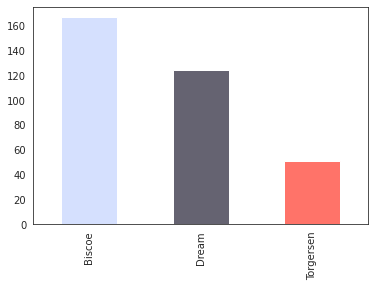

In [ ]:
penguins['island'].value_counts().plot(kind='bar',color=['#d5e0fe','#656371','#ff7369'])

__Répartition des pingouins parmi les 3 espèces :__
- Chinstrap : 68
- Gentoo : 123
- Adelie : 151

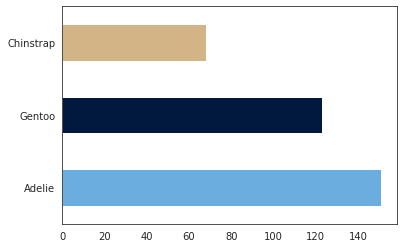

In [ ]:
sns.set_style('white')
penguins['species'].value_counts().plot(kind='barh',color=['#6baddf','#01193f','#d2b486'])

__Répartition des espèces sur chaque île :__
- Adelie vit sur les 3 iles
- Gentoo sur une seule : Biscoe island 
- Chinstrap sur une seule : Dream

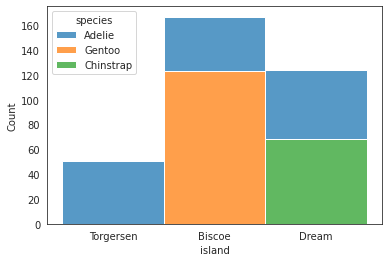

In [ ]:
sns.histplot(data=penguins, x="island", hue="species", multiple="stack")

**Répartition du sexe au sein des espèces**
- On constate que les populations sont équilibrées

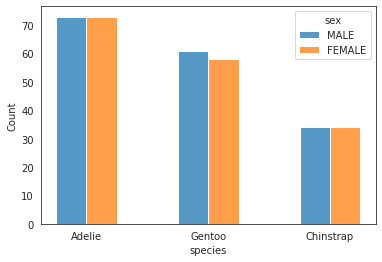

In [ ]:
penguins_temp = penguins.loc[penguins['sex'] != 'UNKNOWN']
sns.histplot(data=penguins_temp, x="species", hue="sex", multiple='dodge', shrink = .5)

**Masse de l'animal en fonction de son espèce et de son sexe**
- Pour les 3 espèces, un male pèse en moyenne plus lourd qu'une femelle. 
- La masse semble avoir la même variance / répartition pour les 3 espèces autour de leurs médiannes respectives
- Les pingouins Gentoo pèsent plus lourd que les deux autres espèces.
- Les pingouins Chinstrap et Adelie sont, sexe pris en compte, dans la même gamme de poids et de variance.
- Il n'y a de valeurs extrêmes que pour l'espèce Chinstrap. 
- La variance est élevée pour chaque espèce


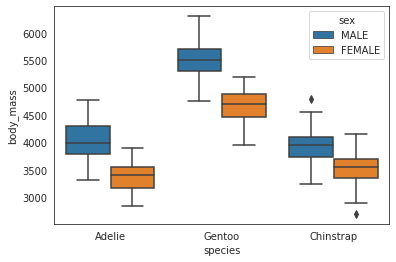

In [ ]:
penguins_temp = penguins.loc[penguins['sex'] != 'UNKNOWN']
sns.boxplot(x=penguins_temp.species,y=penguins_temp.body_mass,hue=penguins_temp.sex)

**Longueur des nageoires en fonction de  l'espèce et du sexe**
- Les Gentoo, + lourds, ont donc des nageoires + grandes que les 2 autres espèces
- Les mâles ont des nageoires + grandes que les femelles
- La variance est + élevée au sein d'Adelie que des deux autres, avec présence de valeurs extrêmes

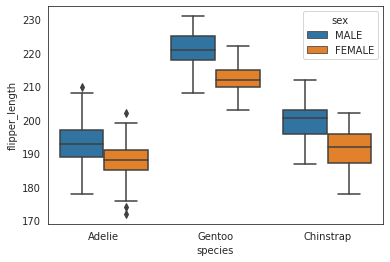

In [ ]:
penguins_temp = penguins.loc[penguins['sex'] != 'UNKNOWN']
sns.boxplot(x=penguins_temp.species,y=penguins_temp.flipper_length,hue=penguins_temp.sex)

**Analyse du bec : longueur, profondeur en fonction des espèces et corrélation entre variables**
- Les becs des males sont plus longs et plus profonds que ceux des femelles 
- La variance est élevée sur la longueur 
- Gentoo ont des becs moins profonds que les deux autres
- Adelie ont des becs moins longs que les deux autres 
- Chinstrap ont donc des becs longs et profonds

- On peut identifier nettement 3 groupes quand on observe les corrélations, chaque groupe coreespondant à une espèce.
- Le même diagramme en fonction des sexes ne donne rien d'exploitable
- De même pour le diagramme avec les iles : in seul groupe propre est identifiable sur l'ile ou il n'y a que des pinguouins Gentoo et Dream. L'ile ne semble pas avoir d'influence sur cette caractéristique

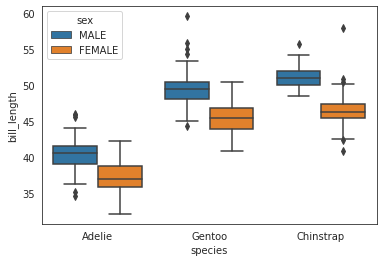

In [ ]:
penguins_temp = penguins.loc[penguins['sex'] != 'UNKNOWN']
sns.boxplot(x=penguins_temp.species,y=penguins_temp.bill_length,hue=penguins_temp.sex)

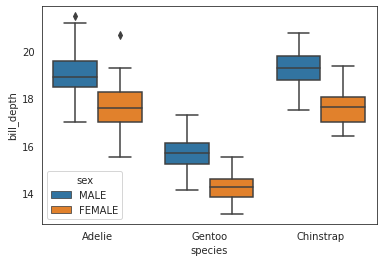

In [ ]:
penguins_temp = penguins.loc[penguins['sex'] != 'UNKNOWN']
sns.boxplot(x=penguins_temp.species,y=penguins_temp.bill_depth,hue=penguins_temp.sex)

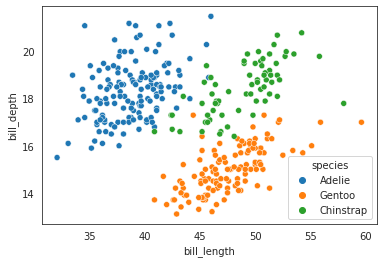

In [ ]:
sns.scatterplot(x=penguins_temp.bill_length,y=penguins_temp.bill_depth,hue=penguins_temp.species)

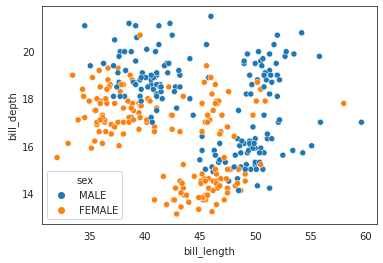

In [ ]:
sns.scatterplot(x=penguins_temp.bill_length,y=penguins_temp.bill_depth,hue=penguins_temp.sex)

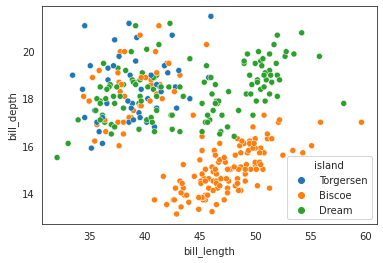

In [ ]:
sns.scatterplot(x=penguins_temp.bill_length,y=penguins_temp.bill_depth,hue=penguins_temp.island)

**Recherche de corrélation entre variables**

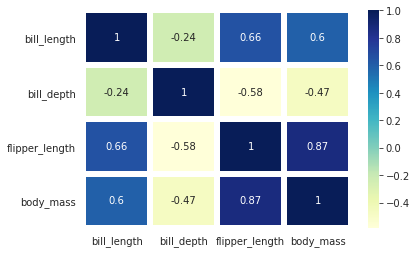

In [ ]:
correlation_matrix=penguins.corr()
sns.heatmap(correlation_matrix,annot=True,linecolor='white',linewidths=5,cmap="YlGnBu")

Quelques chiffres sautent aux yeux : 
- La masse et la longueur des nageoires sont très corrélées, ce qui parait logique. 
- On remarque la corrélation négative entre la profondeur et la longueur du bec : ça illustre qu'un chiffre de corrélation n'est pas suffisant pour refléter la réalité. 

**Corrélations en 2 dimensions :**
- Relation linéaire entre la longueur des nageoires et la masse
- Relations linéaires dans la majorité des cas, surtout en séparant par groupe
- On identifie souvent deux classes : adelie + chinstrap et gentoo seul, que ce soit sur les distributions ou sur les corrélations entre variables

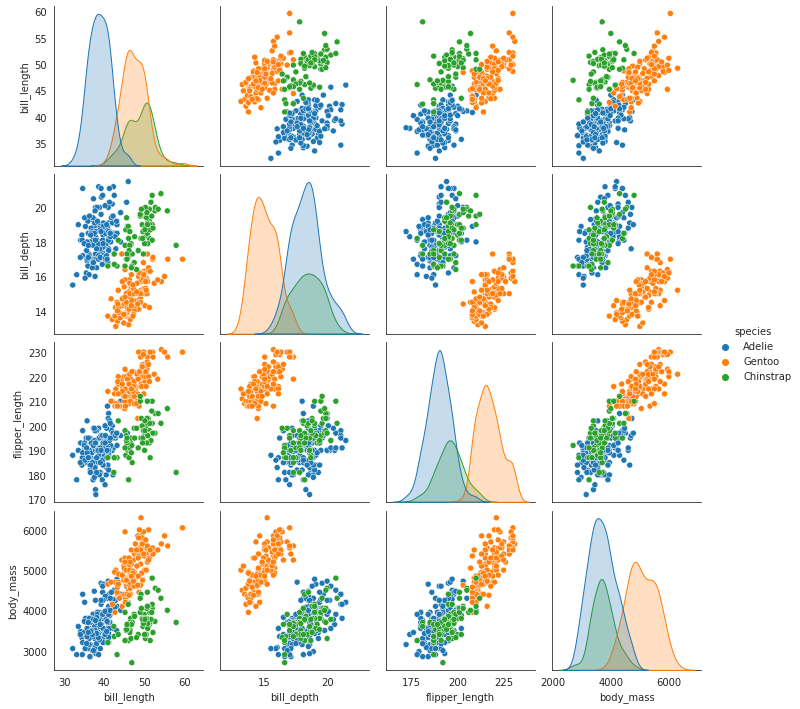

In [ ]:
sns.pairplot(penguins, hue='species')

**Conclusion de l'analyse exploratoire à ce stade :**
- Adelie vie sur les 3 iles
- Gentoo et Chinstrap vivent sur une seule ile (pas la meme)
- Les individus sont équitablement répartis au niveau des sexes
- Les males sont toujours plus lourds que les femelles, et ont toujours des becs plus grands et plus profonds
- Gentoo sont + lourds et ont des nageoires + grandes 
- Adelie et chinstrap partagent beaucoup de caractéristiques, et seraient assimilables à la même classe
- Les becs montrent 3 classes différentes 
- Les autres données montrent 2 classes  différentes 
- La corrélation la plus forte semble etre masse / longueur des nageoires
- On voit d'autres corrélations linéaires

#Analyse exploratoire avancée 

**ACP**

In [ ]:
from sklearn.decomposition import PCA

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1dd35576-464a-4d46-a0e6-752fc35b7463' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>